<a href="https://colab.research.google.com/github/jl0274/windturbinemodels/blob/main/visualizelongdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is helper code to visualize the full dataset spread of power based on a smaller dataset that takes in every 100th row from the full dataset

In [1]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'Colab Notebooks/COS IW: Wind Turbines')
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [2]:
import pandas as pd

# read in data
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/COS IW: Wind Turbines/long_data_concat.csv')

# select relevant columns - reduce from 68 to 16 vars
relevant_df = df[['Time', 'XTurbSpeed1', 'GTEMP1', 'AIRTN', 'YP', 'WDNA',
                  'AIRHNA', 'BRDTEMP', 'PAB1', 'PAB2', 'PAB3', 'RST2', 'WD30',
                  'WS30', 'WDN', 'WSN', 'MaxPwrEst']]

In [14]:
relevant_df.shape

(146121, 17)

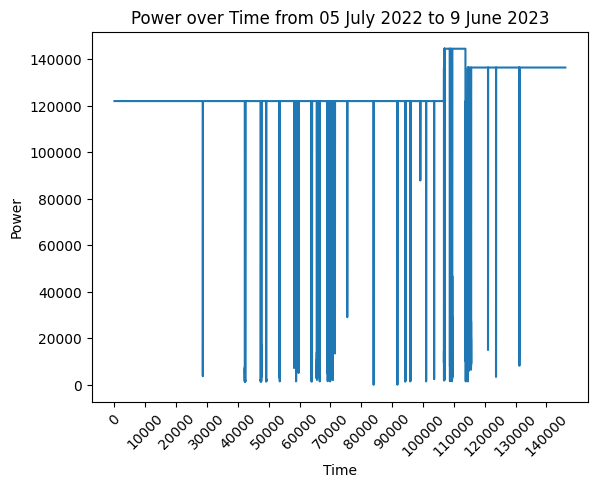

In [3]:
import matplotlib.pyplot as plt
# graph data of variables over the course of a day
# relevant_df.loc['Time'] = pd.to_datetime(relevant_df['Time'])
# print(relevant_df['Time'].head())

# Plotting the 'power' column
plt.plot(relevant_df['MaxPwrEst'])

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power over Time from 05 July 2022 to 9 June 2023')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.xticks(range(0, len(relevant_df), 10000))

# Display the plot
plt.show()

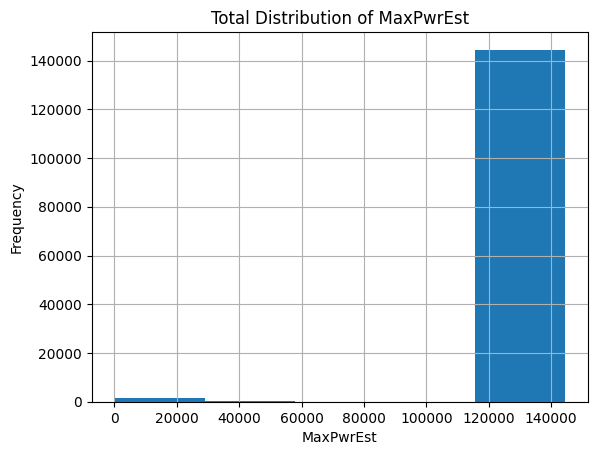

In [4]:
import matplotlib.pyplot as plt
# visualize distribution of MaxPwrEst
# Plot the distribution of 'MaxPwrEst' using a histogram
df['MaxPwrEst'].hist(bins=5)

# Add labels and title
plt.xlabel('MaxPwrEst')
plt.ylabel('Frequency')
plt.title('Total Distribution of MaxPwrEst')

# Show the plot
plt.show()

In [5]:
# Count the number of rows where 'MaxPwrEst' equals 122020
count_122020 = len(df[df['MaxPwrEst'] == 122020])

# Print the count
print("Number of rows where MaxPwrEst = 122020:", count_122020)
# print percentage
print('Percentage of rows where MaxPwrEst = 122020:', count_122020 / len(df) * 100, '%')

Number of rows where MaxPwrEst = 122020: 106298
Percentage of rows where MaxPwrEst = 122020: 72.74655935834001 %


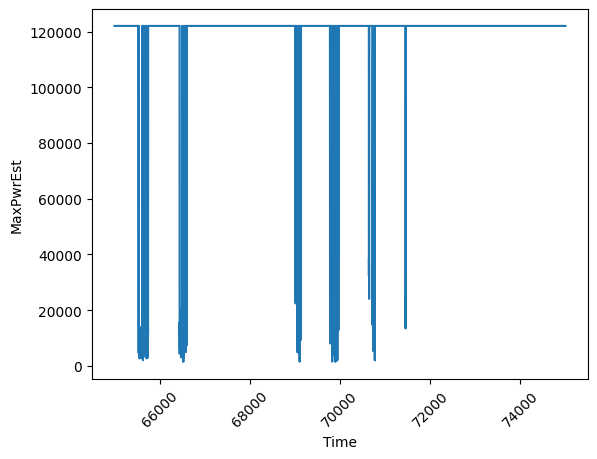

(146121, 17)

In [6]:
start_loc = 65000
length = 10000

sliced_df = relevant_df.iloc[start_loc:start_loc+length]

# Plotting the 'MaxPwrEst' variable
plt.plot(sliced_df['MaxPwrEst'])

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('MaxPwrEst')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

relevant_df.shape

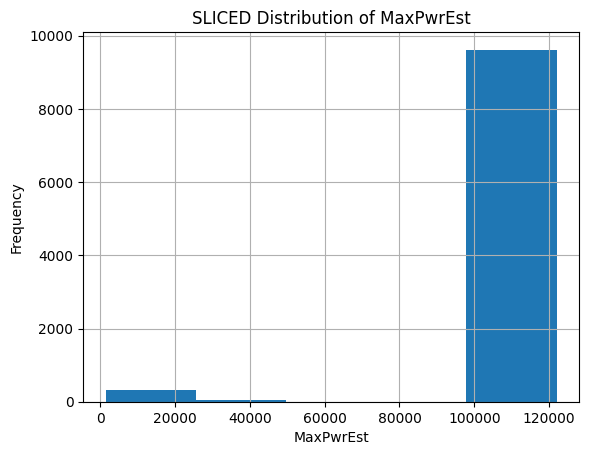

In [7]:
import matplotlib.pyplot as plt
# visualize distribution of MaxPwrEst
# Plot the distribution of 'MaxPwrEst' using a histogram
sliced_df['MaxPwrEst'].hist(bins=5)

# Add labels and title
plt.xlabel('MaxPwrEst')
plt.ylabel('Frequency')
plt.title('SLICED Distribution of MaxPwrEst')

# Show the plot
plt.show()

Sliced df metrics

In [8]:
# Count the number of rows where 'MaxPwrEst' equals 122020
count_122020 = len(sliced_df[sliced_df['MaxPwrEst'] == 122020])

# Print the count
print("Number of rows where MaxPwrEst = 122020:", count_122020)
# print percentage
print('Percentage of rows where MaxPwrEst = 122020:', count_122020 / len(sliced_df) * 100, '%')

Number of rows where MaxPwrEst = 122020: 9616
Percentage of rows where MaxPwrEst = 122020: 96.16 %


# Test on real, unconcatenated data

In [9]:
start_loc = 69700

rows_skip = range(1, start_loc*100 + 1)
full_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/COS IW: Wind Turbines/longdata_20220706_20231231.csv',
                 skiprows=rows_skip,
                 nrows=200000,
                      usecols=['Time', 'XTurbSpeed1', 'GTEMP1', 'AIRTN', 'YP', 'WDNA',
                  'AIRHNA', 'BRDTEMP', 'PAB1', 'PAB2', 'PAB3', 'RST2', 'WD30',
                  'WS30', 'WDN', 'WSN', 'MaxPwrEst'])

In [10]:
new_df = full_df[5000:105000]

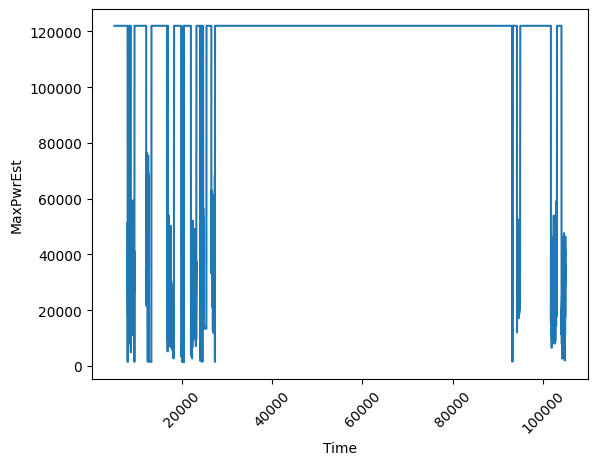

(100000, 17)

In [11]:
# Plotting the 'MaxPwrEst' variable
plt.plot(new_df['MaxPwrEst'])

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('MaxPwrEst')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()
new_df.shape

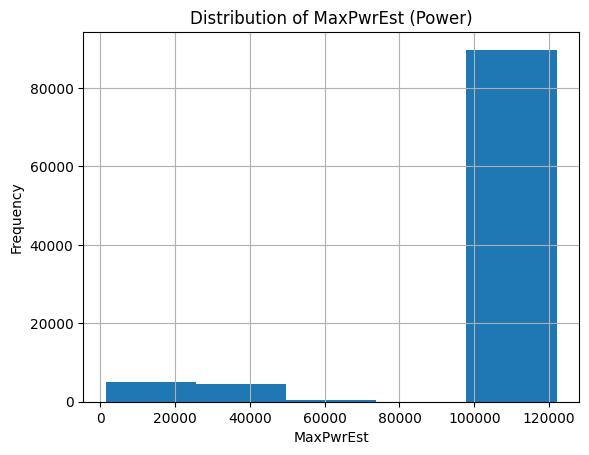

In [16]:
import matplotlib.pyplot as plt
# visualize distribution of MaxPwrEst
# Plot the distribution of 'MaxPwrEst' using a histogram
new_df['MaxPwrEst'].hist(bins=5)

# Add labels and title
plt.xlabel('MaxPwrEst')
plt.ylabel('Frequency')
plt.title('Distribution of MaxPwrEst (Power)')

# Show the plot
plt.show()

In [13]:
# Count the number of rows where 'MaxPwrEst' equals 122020
count_122020 = len(new_df[new_df['MaxPwrEst'] == 122020])

# Print the count
print("Number of rows where MaxPwrEst = 122020:", count_122020)
# print percentage
print('Percentage of rows where MaxPwrEst = 122020:', count_122020 / len(new_df) * 100, '%')

Number of rows where MaxPwrEst = 122020: 89751
Percentage of rows where MaxPwrEst = 122020: 89.751 %
